## Click Counter

In [2]:
def calculate_angle(landmarks, joints):
    a = np.array(landmarks[joints[0]])
    b = np.array(landmarks[joints[1]])
    c = np.array(landmarks[joints[2]])

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    return angle


Exception in thread Thread-7 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-8 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
Exception in thread Thread-9 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _boot

Right arm is bent
Back is straight
Please keep your wrist straight with vertical
Please keep your wrist straight with vertical
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face


Exception in thread Thread-14 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-15 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
Exception in thread Thread-16 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self.run()
  File "c:\Users\anish\mini

Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face


Exception in thread Thread-20 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-21 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
Exception in t

Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face


Exception in thread Thread-29 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-30 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
Exception in thread Thread-31 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\mini

Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face


Exception in thread Thread-38 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
Exception in thread Thread-39 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
Exception in thread Thread-40 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    raise RuntimeError('run loop already started')
RuntimeError: run loop a

Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight


Exception in thread Thread-49 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
  File "c:\Users\anish\miniconda3\envs\m

Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your wrist straight with vertical
Please keep your wrist straight with vertical
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face


Exception in thread Thread-57 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-58 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
Exception in thread Thread-59 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
Exception in thread Thread-60 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run(

Right arm is bent
Back is straight
Please keep your wrist straight with vertical
Please keep your wrist straight with vertical
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent


    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
Exception in thread Thread-68 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop al

Back is straight
Right arm is bent
Back is straight
Right arm is bent
Back is straight
Back is straight


Exception in thread Thread-74 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-75 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Use

Back is straight
Back is straight
Back is straight


Exception in thread Thread-77 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-78 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Use

Back is straight
Back is straight
Back is straight
Back is straight


    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-81 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop al

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-84 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-85 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Use

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-88 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-89 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Use

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-93 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-94 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Use

Back is straight
Back is straight
Back is straight
Back is straight


    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-97 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-98 (speak):
Traceback (most recent call last):
  Fil

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-100 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-101 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-105 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-106 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Thread-108 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-109 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-113 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-114 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-117 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-118 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Thread-120 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-121 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-124 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-125 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight


Exception in thread Thread-128 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-129 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-131 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-133 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-135 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-136 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-140 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-141 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Thread-143 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-144 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-148 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-149 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-152 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop a

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-155 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-156 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-159 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-160 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-164 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-165 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-168 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-169 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-100.04458402483812
Back is straight
-100.37526275305389
Back is straight
-100.2918406757526


Exception in thread Thread-171 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-173 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-101.31364787256032
Back is straight
-101.30747902129643
Back is straight
-101.03331879298152
Back is straight


Exception in thread Thread-174 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-175 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

-101.31294968045012
Back is straight
-101.53758218757564
Back is straight
-100.00221788800809


Exception in thread Thread-177 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-178 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-101.23589718751708
Back is straight
-101.35762012816221
Back is straight
-101.08226179282379


Exception in thread Thread-180 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-181 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-101.70661725503317
Back is straight
-101.12105861509332
Back is straight


Exception in thread Thread-182 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-183 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

-101.83781397412532
Back is straight
-99.82646236202596
Back is straight
-100.32261825864936
Back is straight
-101.73539835810936


    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-186 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop a

Back is straight
-102.08106524390321
Back is straight
-102.06798148451358
Back is straight
-101.95883147065767


Exception in thread Thread-189 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-190 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-99.26059425209519
Back is straight
-99.92659861153096
Back is straight
-99.97218758525395


Exception in thread Thread-192 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-193 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-98.96851525063205
Back is straight
-99.6161734279955
Back is straight
-99.85976627965924


Exception in thread Thread-195 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-196 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-99.62486727360057
Back is straight
-99.68420470983521
Back is straight
-99.19292448854131
Back is straight


    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-199 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop a

-99.16847734243797
Back is straight
-99.96913743928332
Back is straight
-100.37666498594879


Exception in thread Thread-201 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-202 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-100.40378468528561
Back is straight
-100.31832195408592
Back is straight
-100.17807337506036


Exception in thread Thread-204 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-205 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-100.64830210036607
Back is straight
-99.48803155388275
Back is straight
-99.39707176487346


Exception in thread Thread-207 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-209 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-99.49007360436532
Back is straight
-99.2569926015981
Back is straight
-99.45771445913475


Exception in thread Thread-210 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-211 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-99.31913943375083
Back is straight
-99.22743327512127
Back is straight
-100.77405593695569


Exception in thread Thread-213 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-214 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
Exception in thread Thread-215 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in

Back is straight
-103.58975076592314
Back is straight
-107.08856124533408
Thumb bent
Back is straight
-106.77896849893206
Thumb bent


Exception in thread Thread-218 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-219 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWai

Back is straight
-106.92086361951866
Thumb bent
Back is straight
Please keep your wrist straight with vertical
Please keep your wrist straight with vertical
Back is straight
-106.86371333406582
Thumb bent


Exception in thread Thread-224 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-225 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-104.20195252734847
Back is straight
-103.90334677183024
Back is straight
-103.71752217997626
Back is straight


Exception in thread Thread-227 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
Exception in thread Thread-228 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWai

Please keep your wrist straight with verticalPlease keep your wrist straight with vertical

Back is straight
Please keep your wrist straight with vertical
Please keep your wrist straight with vertical
Back is straight
Please keep your wrist straight with vertical
Please keep your wrist straight with vertical


Exception in thread Thread-233 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
Exception in thread Thread-234 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWai

Back is straight
Please keep your wrist straight with vertical
Please keep your wrist straight with vertical
Back is straight
-102.53542073016726
Back is straight
-102.44611221664431


Exception in thread Thread-237 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-238 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-103.00885387950977
Back is straight
-102.03569020515857
Back is straight
-101.70821645236245


Exception in thread Thread-240 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-241 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-100.95466315174585
Back is straight
-100.94421130352222
Back is straight
-99.53418157519314


Exception in thread Thread-243 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-244 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight-97.75722783236996

Back is straight
-99.59600018720029
Back is straight
-98.75844201461014


Exception in thread Thread-246 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-247 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-99.07875308662764
Back is straight
-98.72741158245972
Back is straight
-99.19222815840705


Exception in thread Thread-249 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-250 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-98.195469036035
Back is straight
-98.71202695406974
Back is straight
-99.03947581379751


Exception in thread Thread-252 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-253 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-99.2985004259717
Back is straight
-98.84149694982654
Back is straight
-99.58792344718142


Exception in thread Thread-255 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-256 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
-99.707749955999
Back is straight
-98.00698186097205
Back is straight


Exception in thread Thread-258 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-259 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Thread-261 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-262 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-265 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-266 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
Exception in thread Thread-267 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in

Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face


Exception in thread Thread-275 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-276 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
Exception in thread Thread-277 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self.run()
  File "c:\Users\anish\m

Right arm is bent
Back is straight
Please keep your hand closer to the face
Please keep your hand closer to the face
Right arm is bent
Back is straight
Please keep your wrist straight with vertical
Please keep your wrist straight with vertical
Right arm is bent


    Exception in thread Thread-282 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
    raise RuntimeError('run loop already started')
RuntimeError: run loop a

Back is straight
Right arm is bent
Back is straight
Back is straight
Back is straight


Exception in thread Thread-287 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-288 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-290 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-291 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight
Back is straight


    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-295 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop a

Back is straight
Back is straight
Back is straight
Back is straight


Exception in thread Thread-298 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\Users\anish\miniconda3\envs\ml\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
Exception in thread Thread-299 (speak):
Traceback (most recent call last):
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\anish\miniconda3\envs\ml\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\anish\AppData\Local\Temp\ipykernel_19296\106514449.py", line 26, in speak
  File "c:\U

Back is straight
Back is straight
Back is straight


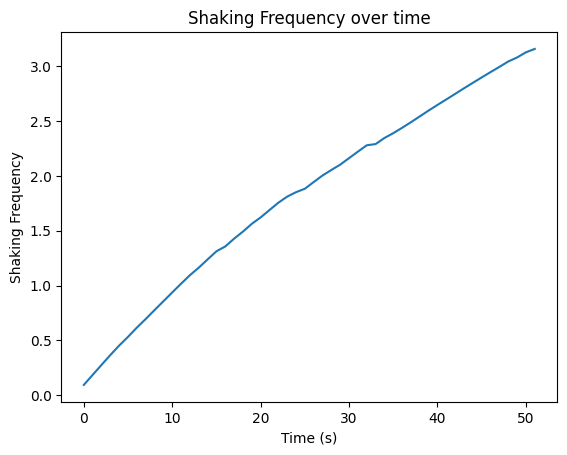

In [3]:
import cv2
import mediapipe as mp
import numpy as np
import math
import pyttsx3
import threading
import time
import matplotlib.pyplot as plt

engine = pyttsx3.init()
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[1].id)
engine.setProperty('rate', 150)

shaking_treshold = 10
prev_landmark = None
start_time = time.time()
shaking_frequency = 0
total_shakes = 0

freqs = []

def speak(text):
    print(text)
    engine.say(text)
    engine.runAndWait()
def async_speak(text):
    threading.Thread(target=speak, args=(text,), daemon=True).start()


mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_face_detection = mp.solutions.face_detection

cap = cv2.VideoCapture(0)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands, mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection, mp_pose.Pose(min_detection_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Hand detections
        hand_results = hands.process(image)
        
        # Face detections
        face_results = face_detection.process(image)

        # pose detection
        pose_results = pose.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if pose_results.pose_landmarks:
            landmarks = np.array([[lm.x * width, lm.y * height] for lm in pose_results.pose_landmarks.landmark])
            angle_r_shoulder_elbow_wrist = calculate_angle(landmarks, [mp_pose.PoseLandmark.RIGHT_SHOULDER, 
                                                                       mp_pose.PoseLandmark.RIGHT_ELBOW, 
                                                                       mp_pose.PoseLandmark.RIGHT_WRIST])
            if angle_r_shoulder_elbow_wrist < 90:
                async_speak("Right arm is bent")
            
            # Calculate angle between shoulder, hip, and knee for back straightness
            angle_r_shoulder_hip_knee = calculate_angle(landmarks, [mp_pose.PoseLandmark.RIGHT_SHOULDER, 
                                                                    mp_pose.PoseLandmark.RIGHT_HIP, 
                                                                    mp_pose.PoseLandmark.RIGHT_KNEE])
            if angle_r_shoulder_hip_knee < 160:
                async_speak("Back is not straight")
            if angle_r_shoulder_elbow_wrist > 90 and angle_r_shoulder_hip_knee > 160:   
        # Hand detections
        if hand_results.multi_hand_landmarks:
            for hand_landmarks in hand_results.multi_hand_landmarks:
                landmarks = np.array([[lm.x * width, lm.y * height] for lm in hand_landmarks.landmark])
                hand_bbox = cv2.boundingRect(landmarks.astype(np.float32))
                
                # Draw bounding box around hand
                cv2.rectangle(image, (int(hand_bbox[0]), int(hand_bbox[1])), 
                              (int(hand_bbox[0]+hand_bbox[2]), int(hand_bbox[1]+hand_bbox[3])), 
                              (0, 255, 0), 2)
                
                # Extract tip of the hand (assuming it's at the bottom when held vertically)
                tip_landmark = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST]
                
                # Convert tip landmark to image coordinates
                tip_x = int(tip_landmark.x * width)
                tip_y = int(tip_landmark.y * height)
                
                # Hand position
                hand_position = (tip_x, tip_y)
                
                # Face detections
                if face_results.detections:
                    for detection in face_results.detections:
                        bboxC = detection.location_data.relative_bounding_box
                        
                        # Convert normalized bounding box coordinates to pixels
                        ih, iw, _ = image.shape
                        bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                               int(bboxC.width * iw), int(bboxC.height * ih)
                        
                        # Draw bounding box around face
                        cv2.rectangle(image, bbox, (255, 0, 0), 2)
                        
                        # Face position (considering the center of the bounding box)
                        face_position = (bbox[0] + bbox[2] // 2, bbox[1] + bbox[3] // 2)
                        
                        # Calculate distance between hand tip and face position
                        distance = math.sqrt((hand_position[0] - face_position[0])**2 + (hand_position[1] - face_position[1])**2)
                        
                        # Display distance on the image
                        # cv2.putText(image, f"Distance: {distance:.2f} pixels", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                        
                        # Calculate wrist and finger angles only if distance is between 100 to 150 pixels
                        if 100 <= distance <= 200:
                            # Check if wrist is straight with vertical
                            wrist = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST]
                            middle_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP]

                            angle_with_vertical = math.degrees(math.atan2(wrist.y - middle_finger_tip.y, wrist.x - middle_finger_tip.x))
                            # normalize the angle to be between 0 and 180 degrees and check if it's within 85 to 105 degrees
                            angle_with_vertical = abs(angle_with_vertical) % 180
                            # Proceed with angle calculation only if wrist is straight with vertical
                            if  48 <= angle_with_vertical <= 105:
                                # Check which finger is at the top
                                # cv2.putText(image, f"Angle : {angle_with_vertical:.2f} degrees", (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                                thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP]
                                index_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
                                middle_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP]
                                ring_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP]
                                pinky_tip = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP]

                                # check which finger is at the top and set the top finger
                                top_finger = None
                                top_tip = None
                                if thumb_tip.y < index_finger_tip.y and thumb_tip.y < middle_finger_tip.y and thumb_tip.y < ring_finger_tip.y and thumb_tip.y < pinky_tip.y:
                                    top_finger = "Thumb"
                                    top_tip = thumb_tip
                                elif index_finger_tip.y < thumb_tip.y and index_finger_tip.y < middle_finger_tip.y and index_finger_tip.y < ring_finger_tip.y and index_finger_tip.y < pinky_tip.y:
                                    top_finger = "Index Finger"
                                    top_tip = index_finger_tip
                                elif middle_finger_tip.y < thumb_tip.y and middle_finger_tip.y < index_finger_tip.y and middle_finger_tip.y < ring_finger_tip.y and middle_finger_tip.y < pinky_tip.y:
                                    top_finger = "Middle Finger"
                                    top_tip = middle_finger_tip
                                elif ring_finger_tip.y < thumb_tip.y and ring_finger_tip.y < index_finger_tip.y and ring_finger_tip.y < middle_finger_tip.y and ring_finger_tip.y < pinky_tip.y:
                                    top_finger = "Ring Finger"
                                    top_tip = ring_finger_tip
                                else:
                                    top_finger = "Pinky"
                                    top_tip = pinky_tip
                                
                                base_tip = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST]
                                # Calculate angle with the top finger
                                angle = math.degrees(math.atan2(top_tip.y - base_tip.y , top_tip.x - base_tip.x))

                                # Draw angles on the image
                                if top_finger == "Thumb":
                                    print(angle)
                                    if abs(angle) > 106.5:
                                        async_speak("Thumb bent")
                                elif top_finger == "Index Finger":
                                    if abs(angle) >106.5:
                                        async_speak("Index Finger bent")
                                else:
                                    async_speak("Please use only Thumb or Index Finger")
                                    print("Please use only Thumb or Index Finger")
                                if prev_landmark is not None:
                                    disp = np.linalg.norm(landmarks-prev_landmark)
                                    if disp > shaking_treshold:
                                        total_shakes += 1
                                        shaking_frequency = total_shakes / (time.time() - start_time)
                                        freqs.append(shaking_frequency)
                                        # cv2.putText(image, f"Shaking Freq: {shaking_frequency},", (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                                prev_landmark = landmarks.copy()
                            else:
                                async_speak("Please keep your wrist straight with vertical")
                                print("Please keep your wrist straight with vertical")
                        else:
                            async_speak("Please keep your hand closer to the face")
                            print("Please keep your hand closer to the face")
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# plot the shaking frequency over time
plt.plot(freqs)
plt.xlabel("Time (s)")
plt.ylabel("Shaking Frequency")
plt.title("Shaking Frequency over time")
plt.show()

